## Segundo Examen Parcial  de Estadística Aplicada
Enero-Junio 2023

**Nombre:** Alejandro Hernández Cerda

**Matricula:** 1903855

**Gpo:** 041

**Instrucciones:** En cada punto importa las librerias que consideres necesarias

In [1]:
# Importa las librerias de numpy, python y matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import WeibullFitter,CoxPHFitter,ExponentialFitter,LogNormalFitter,KaplanMeierFitter
%matplotlib inline

In [2]:
# importa la base de datos llamada credit_risk.csv
# https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv
credito = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
credito

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,real_estate,67,None,own,2,official,1,1,1,1
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,real_estate,22,None,own,1,official,1,0,1,0
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,real_estate,49,None,own,1,unskilled,2,0,1,1
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,life_insurance,45,None,free,1,official,2,0,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,no_property,53,None,free,2,official,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,real_estate,31,None,own,1,unskilled,1,0,1,1
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,life_insurance,40,None,own,1,management,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,other,38,None,own,1,official,1,0,1,1
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,no_property,23,None,free,1,official,1,1,1,0


In [3]:
credito[['duration','amount','full_repaid']]

,duration,amount,full_repaid
0,6,1169,1
1,48,5951,0
2,12,2096,1
3,42,7882,1
4,24,4870,0
...,...,...,...
995,12,1736,1
996,30,3857,1
997,12,804,1
998,45,1845,0


Tiempo: Duration
Evento: Full repaid ; donde 0 es no completado de pagar y 1 es completamente pagado

La base de datos es la información proporcionada por un banco donde nos muestra el tiempo que transcurre desde que un cliente pide un préstamo hasta que lo paga completamente (evento)

a continuación se muestran la descripción de la base de datos



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">   <br>Característica   </th>
    <th class="tg-fymr">   <br>Variable   </th>
    <th class="tg-fymr">   <br>Tipo   </th>
    <th class="tg-fymr">   <br>Descripción   </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">   <br>Time   </td>
    <td class="tg-0pky">   <br>duration   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Duration in month   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Event   </td>
    <td class="tg-0pky">   <br>full_repaid   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Specifies if the loan was fully   repaid   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>age   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Age of the borrower (in years)   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>foreign_worker   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower is a   foreign worker   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>personal_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Gender and Marital status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>people_liable   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of people being liable to   provide maintenance for   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>telephone   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower owns a   phone   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>employment_years   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Years of employment at current job   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>job   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Employment status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>housing   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Residential status of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>present_residence   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Years living at current residence   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>amount   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Amount of money borrowed   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>installment_rate   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Percentage of amount borrowed that   will be charged by a lender to a borrower.   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>purpose   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Reason to get a loan   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>checking_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the checking account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>credit_history   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Credit history of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>number_of_credits   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of existing credits at this   bank   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>other_installment_plans   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of installments plans the   borrower already has   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>savings_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the saving account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>property   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of valuable assets the   borrower owns   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>other_debtors   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Indicate if someone else will be   involved in the repayment or is guaranteeing the loan   </td>
  </tr>
</tbody>
</table>

1. El banco sospecha que entre mas pasa el tiempo más díficil es que puedan pagar los clientes que se les concedió un préstamo. 

a) Calcula el promedio del monto del préstamo de los que pagaron y el promedio del monto de los que no han pagado.

b) Ajusta un modelo weibull y un modelo log-normal y graficas las funciones de riesgo respectivas. 


In [4]:
# Inciso a)
credito_pagado  = credito[credito['full_repaid']==1]
prom_pag = credito_pagado['amount'].mean()
print(f'El monto promedio del prestamo de los que si pagaron fue: {prom_pag}')

credito_nopagado = credito[credito['full_repaid']==0]
prom_nopag = credito_nopagado['amount'].mean()
print(f'El monto promedio del prestamo de los que no pagaron fue: {prom_nopag}')

El monto promedio del prestamo de los que si pagaron fue: 2985.457142857143
El monto promedio del prestamo de los que no pagaron fue: 3938.1266666666666


In [5]:
tiempo_creditopagado = credito_pagado['duration'].mean()
tiempo_creditonopagado= credito_nopagado['duration'].mean()
print(f'El tiempo promedio que tardaron en pagar su deudad fue de: {tiempo_creditopagado}')
print(f'El tiempo promedio de los que aun no logran pagar su deudad fue de: {tiempo_creditonopagado}')


El tiempo promedio que tardaron en pagar su deudad fue de: 19.207142857142856
El tiempo promedio de los que aun no logran pagar su deudad fue de: 24.86


Podemos notar como hay una variable que también nos habla de un posible evento.\
Una hipotesis es que entre mayor sea la cantidad de dinero pedido en el prestamo, menor es la capacidad de cumplimiento de pago.\
Siendo así una relación inversa en la capacidad de cumplimiento respecto a la cantidad del prestamo

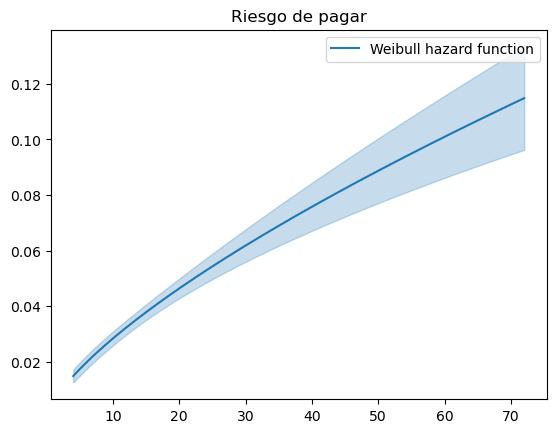

In [6]:
#inciso b)
## Funcion de riesgo (WEIBULL FUNCTION)
W1 = WeibullFitter().fit(credito['duration'],credito['full_repaid'])
W1.plot_hazard(label='Weibull hazard function').legend()
plt.title('Riesgo de pagar')
plt.show()

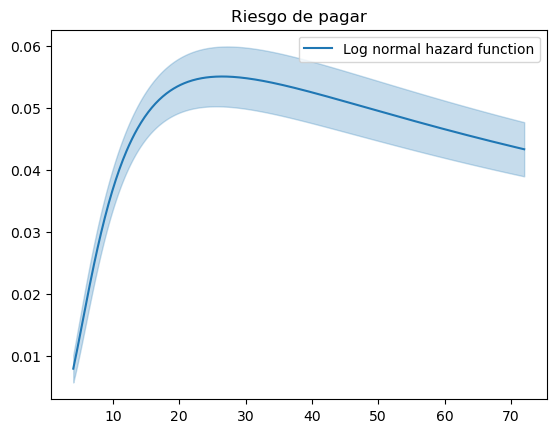

In [7]:
#inciso b)
##Funcion log normal
L1 = LogNormalFitter().fit(credito['duration'],credito['full_repaid'])
L1.plot_hazard(label='Log normal hazard function').legend()
plt.title('Riesgo de pagar')
plt.show()

c) comenta que significa la grafica de la función de riesgo de la weibull respecto a si los clientes tardan en pagar

**Podemos apreciar como entre mayor sea el tiempo que pase , mayor será la el riesgo de incumplimiento de pago**

d) comenta que significa la grafica de la función de riesgo de la log-normal respecto a si los clientes tardan en pagar

**Podemos ver como entre menor sea el tiempo que pase, menor será el riesgo de incumplimiento de pago**

2. Estima la función de supervivencia por el método de Kaplan-Meier para el tiempo que tardan los clientes en pagar y muestra su gráfica correspondiente

In [8]:
K1 = KaplanMeierFitter().fit(credito['duration'],credito['full_repaid'])
K1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


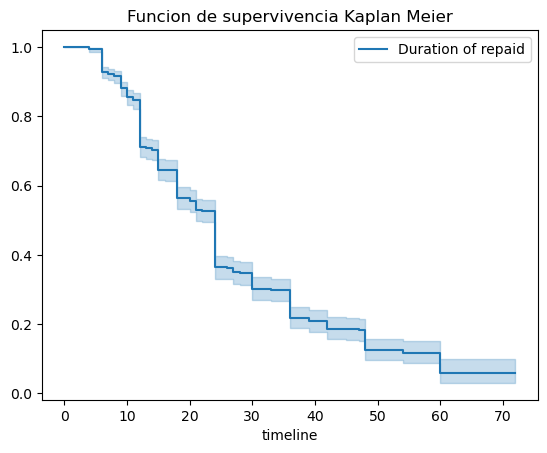

In [9]:
K1.plot_survival_function(label='Duration of repaid')
plt.title('Funcion de supervivencia Kaplan Meier')
plt.show()

3. Coloca la gráfica de kaplan Meier sobre la grafica de supervivencia log-normal 

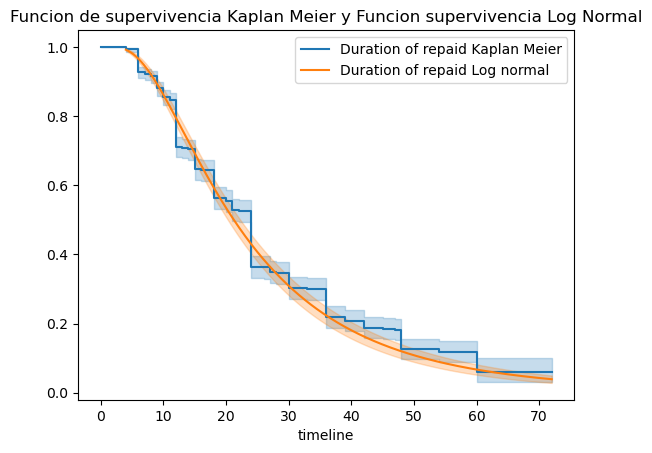

In [10]:
K1.plot_survival_function(label='Duration of repaid Kaplan Meier')
L1.plot_survival_function(label='Duration of repaid Log normal')
plt.title('Funcion de supervivencia Kaplan Meier y Funcion supervivencia Log Normal')
plt.show()

4. Comenta si las graficas se parecen o no, y en que se diferencian

**Podemos apreciar como las gráficas coinciden en el aspecto de que, entre mayor sea el prestamo menor es la funcion de supervivencia, es decir, entre mayor sea el prestamo mayor será el tiempo que tarden en pagar y por lo mismo, menor sea la probabilidad de pago del mismo, pero se diferencian en la forma en la que se realiza, pues toma intervalos de tiempo constantes de tiempo mientras que la Kaplan meier toma intervalos discretos**

5. El banco considera que los que piden préstado una gran cantidad de dinero en realidad nunca piensa pagar

a) calcula la mediana de la cantidad que pidieron prestado (amount of money borrowed), asigna un 1 a quienes se encuentran igual o arriba de la mediana (deben mucho) y 0 a los que se encuentran debajo de la mediana (deben poco)

In [11]:
#inciso a)
credito.describe()

,duration,amount,installment_rate,present_residence,age,number_of_credits,people_liable,telephone,foreign_worker,full_repaid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.404000,0.963000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000


Podemos ver como la mediana , que en este caso es el cuartil 2 (o 50%), de la cantidad prestada es 2319.5, por lo que en base a esto haré el problema

In [12]:
credito['Amount_median']=np.where(credito['amount']>=2319.5,1,0)
credito

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid,Amount_median
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,67,None,own,2,official,1,1,1,1,0
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,22,None,own,1,official,1,0,1,0,1
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,49,None,own,1,unskilled,2,0,1,1,0
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,45,None,free,1,official,2,0,1,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,53,None,free,2,official,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,31,None,own,1,unskilled,1,0,1,1,0
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,40,None,own,1,management,1,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,38,None,own,1,official,1,0,1,1,0
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,23,None,free,1,official,1,1,1,0,0


b) Elabora y grafica juntas las funciones de supervivencia por el método de Kaplan-Meier para los que deben mucho y para los que deben poco.

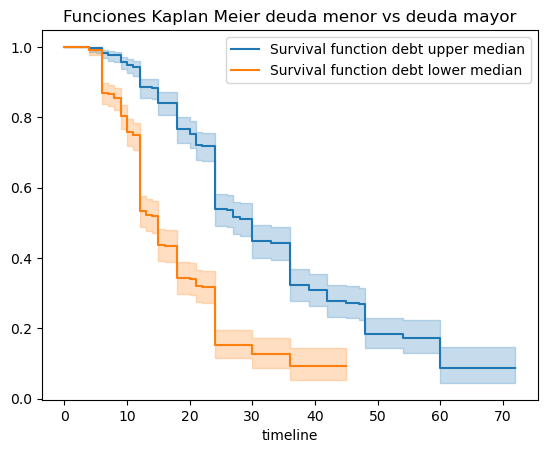

In [13]:
#inciso b)
DeudaMayor=credito[credito['Amount_median']==1]
DeudaMenor=credito[credito['Amount_median']==0]

kmMayor=KaplanMeierFitter().fit(DeudaMayor['duration'],DeudaMayor['full_repaid'])
kmMenor=KaplanMeierFitter().fit(DeudaMenor['duration'],DeudaMenor['full_repaid'])
kmMayor.plot_survival_function(label='Survival function debt upper median')
kmMenor.plot_survival_function(label='Survival function debt lower median')
plt.title('Funciones Kaplan Meier deuda menor vs deuda mayor')
plt.show()

c)Interpreta las graficas de supervivencia, ¿qué significan? ¿quién paga más rápido? ¿quién tarda en pagar más?  


**Podemos ver como aquellas personas que deben menos o que pidieron menor prestamo son aquellas cuyo riesgo se extinge más rapido, es decir, las cuales pagan a menor cantidad de tiempo\
Mientras que contrariamente con aquellas que deben más, estas tardan en pagar más tiempo**

d)Elabora un log-rank test para comprobar si las funciones de supervivencia de los que deben mucho y los que deben poco son distintas, e interpreta el resultado de la prueba

In [14]:
from lifelines.statistics import logrank_test

$ H_o : S_1 = S_2\\
H_a : S_1 \neq S_2$\
Se rechaza $H_o$ si $\alpha>$ p valor

In [15]:
Logn= logrank_test(DeudaMayor['duration'],DeudaMenor['duration'],DeudaMayor['full_repaid'],DeudaMenor['full_repaid'])
Logn.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         199.26 <0.005    147.89

In [16]:
Logn.p_value<.005

True

Podemos ver que p valor es menor a .005 , por lo que rechazamos $H_o$, por lo que podemos asegurar que las funciones de supervivencia de los que tienen mayor deuda son distintas a los que tienen menor deuda

e) ¿el banco tenía razón? Explique

**Podemos decir que el banco tenia razón en sospechar que aquellos que deben mayor dinero, o que tienen una deuda mayor son aquellas personas que tienen más incapacidad de cumplimiento**


6. Elige seis variables para ajustar un modelo de cox de riesgos porporcionales. Antes de correr el modelo explica en qué sentido y por qué afectan el riesgo de pagar el préstamo cada una de las variables elegidas


In [17]:
credito

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid,Amount_median
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,67,None,own,2,official,1,1,1,1,0
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,22,None,own,1,official,1,0,1,0,1
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,49,None,own,1,unskilled,2,0,1,1,0
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,45,None,free,1,official,2,0,1,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,53,None,free,2,official,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,31,None,own,1,unskilled,1,0,1,1,0
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,40,None,own,1,management,1,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,38,None,own,1,official,1,0,1,1,0
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,23,None,free,1,official,1,1,1,0,0


Para el modelo Cox haré uso de 6 variables las cuales son:
* **housing**: Usaré esta variable debido a que, ciertas veces el tener un hogar estable (propio) ayuda más a el cumplimiento de las demás deudas, debido a que no debemos pagar renta
* **job**: Esto es debido a que el contar con trabajo conlleva a tener un ingreso de flujos de efectivo necesario para pagar la deuda
* **age**: La edad es un factor clave, en nuestra sociedad las personas mayores tuvieron una vida en la que la devaluacion de la moneda no estaba tan alta y la inflación más baja, por eso la edad ayuda a ver que tanto es la fortuna de las personas.
* **number_of_credits**: Esto es debido a que el tener más creditos en un banco habla bien de la persona, pues sus deudas las paga a tiempo y es alguien "confiable". 
* **personal_status**: Usaré esta debido a que el ser alguien con pareja quiere decir que tiene más necesidades que cumplir que una persona soltera. 
* **purpose**: El propósito de porque solicitaro el prestamo dice mucho de con quien estás tratando, si es una persona que supone confianza en el pago o no.

In [18]:
C1 = CoxPHFitter().fit(credito,'duration','full_repaid',formula='housing+job+age+number_of_credits+personal_status+purpose')
C1.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4216.86
         time fit was run = 2023-04-02 23:04:46 UTC

---
                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                              
age                              0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
housing[T.own]                   0.72       2.05       0.14             0.44             1.00                 1.55                 2.72
housing[T.rent]                  0.66       1.93       0.17             0.31             1.00                 1.37                 2.71
job[T.official]                  0.24       1.28       0.12             0.02             0.47                 1.02                 1.60
job[T.unemployed]                0.59       1.80       0.29             0.01             1.16                 1.01                 3.20
job[T.unskilled]                 0.59       1.80       0.14             0.32             0.86                 1.38                 2.36
number_of_credits                0.06       1.07       0.07            -0.07             0.20                 0.93                 1.22
personal_status[T.M_divorced]    0.07       1.07       0.13            -0.18             0.32                 0.84                 1.37
personal_status[T.M_single]     -0.01       0.99       0.09            -0.20             0.17                 0.82                 1.18
purpose[T.car_new]               0.58       1.79       0.15             0.28             0.88                 1.32                 2.42
purpose[T.car_used]              0.54       1.72       0.17             0.21             0.87                 1.23                 2.40
purpose[T.domestic_appliances]   0.54       1.72       0.38            -0.21             1.29                 0.81                 3.65
purpose[T.education]             0.48       1.61       0.23             0.02             0.94                 1.02                 2.55
purpose[T.furniture_equipment]   0.62       1.85       0.16             0.31             0.93                 1.36                 2.53
purpose[T.others]               -0.08       0.92       0.41            -0.88             0.72                 0.41                 2.05
purpose[T.radio_TV]              0.66       1.93       0.15             0.37             0.94                 1.45                 2.57
purpose[T.repairs]               0.24       1.28       0.31            -0.35             0.84                 0.70                 2.33
purpose[T.retraining]            1.50       4.50       0.39             0.75             2.26                 2.11                 9.59

                                 cmp to     z      p   -log2(p)
covariate                                                      
age                                0.00  4.59 <0.005      17.77
housing[T.own]                     0.00  4.97 <0.005      20.48
housing[T.rent]                    0.00  3.76 <0.005      12.54
job[T.official]                    0.00  2.09   0.04       4.77
job[T.unemployed]                  0.00  1.99   0.05       4.42
job[T.unskilled]                   0.00  4.31 <0.005      15.88
number_of_credits                  0.00  0.93   0.35       1.50
personal_status[T.M_divorced]      0.00  0.55   0.58       0.78
personal_status[T.M_single]        0.00 -0.16   0.88       0.19
purpose[T.car_new]                 0.00  3.77 <0.005      12.60
purpose[T.car_used]                0.00  3.20 <0.005       9.52
purpose[T.domestic_appliances]     0.00  1.41   0.16       2.66
purpose[T.edu

7. Interpreta la regresión de Cox

* **age**: Como su p valor es menor a .005 podemos decir que la edad afecta el riesgo de cumplimiento de pago
* **housing[T.own]**: Como su p valor es menor a .005 podemos decir que el tener casa propia afecta al riesgo de cumplimiento de pago.
* **housing[T.rent]**: Como su p valor es menor a .005 podemos decir que el tener casa rentada afecta al riesgo de cumplimiento de pago.
* **job[T.official]**: Como su p valor es mayor a .005 podemos decir que el tener trabajo oficial no afecta al riesgo de cumplimiento de pago.
* **job[T.unemployed]**: Como su p valor es mayor a .005 podemos decir que el no tener trabajo oficial no afecta al riesgo de cumplimiento de pago.
* **job[T.unskilled]**: Como su p valor es mayor a .005 podemos decir que el tener trabajo oficial más no uno tan remunerado afecta al riesgo de cumplimiento de pago.
* **number_of_credits**: Como su p valor es mayor a .005 podemos decir que la cantidad de creditos no afecta al riesgo de cumplimiento de pago.
* **personal_status[T.M_divorced]**: Como su p valor es mayor a .005 podemos decir que el ser un hombre divorciado no afecta al riesgo de incumplimiento de pago.
* **personal_status[T.M_single]**: Como su p valor es mayor a .005 podemos decir que el ser un hombre soltero no afecta al riesgo de incumplimiento de pago.
* **purpose[T.car_new]**: Como su p valor es menor a .005 podemos decir que el pedir un prestamo para un carro nuevo si afecta al riesgo de incumplimiento de pago.
* **purpose[T.car_used]**: Como su p valor es menor a .005 podemos decir que el pedir un prestamo para un carro usado si afecta al riesgo de incumplimiento de pago.
* **purpose[T.domestic_appliances]**: Como su p valor es mayor a .005 podemos decir que el pedir un prestamo para cosas del hogar no afecta al riesgo de incumplimiento de pago.
* **purpose[T.education]**: Como su p valor es mayor a .005 podemos decir que pedir un prestamo para cosas de escuela no afecta al riesgo de imcumplimiento de pago.
* **purpose[T.furniture_equipment]**: Como su p valor es menor a .005 podemos decir que pedir un prestamo para muebles del hogar si afecta a el riesgo de incumplimiento de pago.
* **purpose[T.others]**: Como su p valor es mayor a .005 podemos decir que el pedir el prestamo para otras cosas no afecta el riesgo de incumplimiento de pago.
* **purpose[T.radio_TV]**: Como su p valor es menor a .005 podemos decir que el pedir el prestamos para una tv o radio si afecta el riesgo de incumplimiento de pago.
* **purpose[T.repairs]**: Como su p valor es mayor a .005 podemos decir que el pedir un prestamo para reparaciones no afecta al riesgo de incumplimiento de pago
* **purpose[T.retraining]**: Como su p valor es menor a .005 podemos decir que el pedir un prestamos para capacitaciones nuevas o cursos si afecta el riesgo de incumplimiento de pago.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

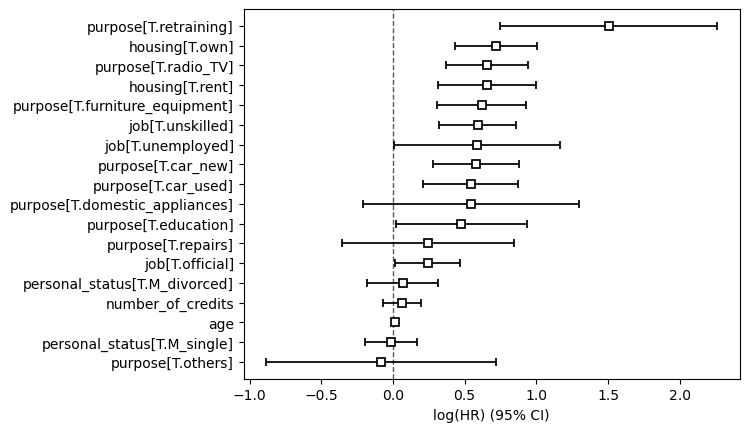

In [19]:
C1.plot()

8. Con base en el análisis hecho hasta ahora qué recomendación podría hacer al banco para mejorar sus políticas de préstamo

Con base a todo lo analizado anteriormente, podemos decir que la empresa debe empezar a tomar cartas en el asunto cuando esta sirva de prestamista para las personas.\
Uno de los principales motivos es la cantidad de dinero prestado, sabemos que históricamente y con datos las personas que piden más dinero del promedio son aquellas que tardan en pagar más o de plano, no pagan su deuda.\
Tomar en cuenta o poner mayores restricciones en la cantidad de dinero prestada a las personas cuyas caracteristicas cumplan los resultados que afectan el riesgo de las pruebas de Cox, pues su riesgo crediticio depende de todos los clientes que paguen.\
Hacer analisis de regresión para poder predecir como se podrá comportar la curva de riesgo y evitar tener muchos deudores.